<a href="https://colab.research.google.com/github/harshdungrani/Projects/blob/main/HeartDiseasePredictionModelUsingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Heart Prediction Model Using ML
#Dataset: Heart Disease UCI
#Classifiers Used: Logistic Regression, LDA, KNN, Random Forest, Decision Tree, Gaussian Naive Bayes 
#Neural Networks with three different Optimizers(Adam, Adamax, Nadam)
#Saved the RF Model with highest accuracy score of 90.16% using pickle

In [ ]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Heart Disease UCI dataset
data=pd.read_csv('/content/heart.csv')

#Data Description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical 
angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


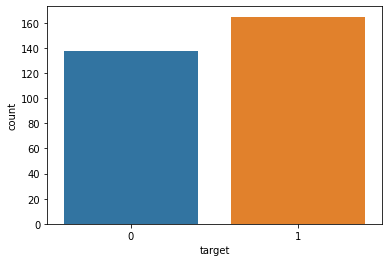

In [ ]:
#Plot of people with and without heart disease
y = data["target"]

sns.countplot(y)
target_temp = data.target.value_counts()

print(target_temp)

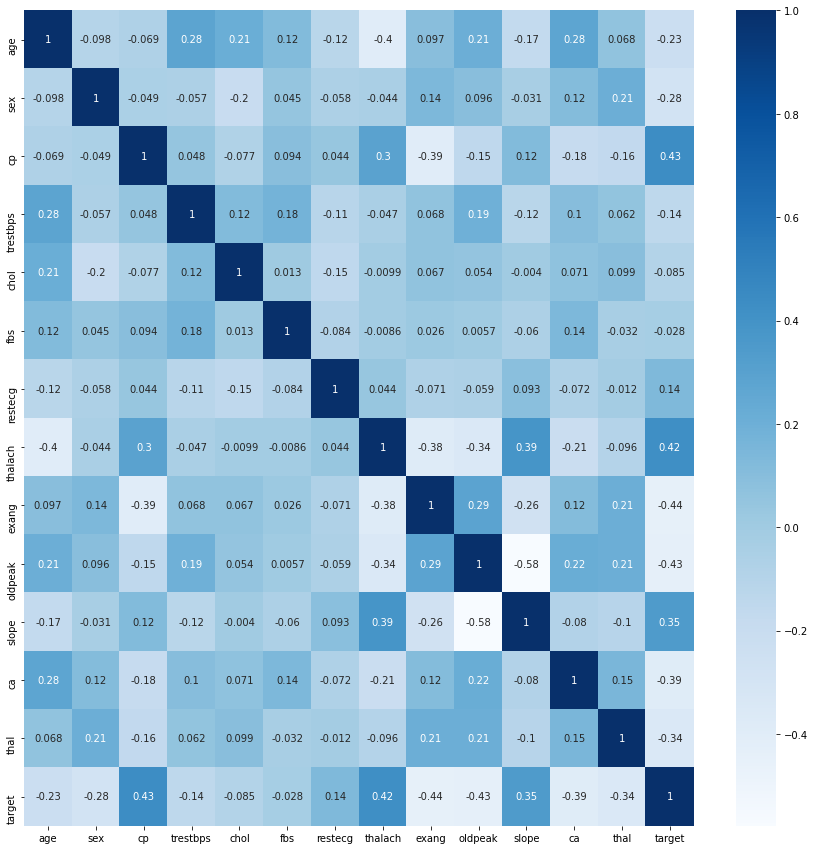

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

In [ ]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(242, 13) (242,) (61, 13) (61,)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lr,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lr,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lr,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lr,average='weighted')))

Recall Score: 0.8524590163934426
Precision Score: 0.8522788686723114
F1 Score: 0.8521362578840489
ROC AUC Score: 0.8485838779956427


#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score achieved using Naive Bayes is: 85.25 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_nb,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_nb,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_nb,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nb,average='weighted')))

Recall Score: 0.8524590163934426
Precision Score: 0.8542866637128932
F1 Score: 0.8512366387330735
ROC AUC Score: 0.8447712418300652


#KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max_accuracy = 0

#finding the value of n_neighbours for maximum accuracy
for x in range(1,243):      #Since n_neighbors <= n_samples,  we have n_samples = 242 thus, n_neighbors = 243
    dt = KNeighborsClassifier(n_neighbors=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

dt = KNeighborsClassifier(n_neighbors=best_x)
dt.fit(X_train,Y_train)
Y_pred_knn = dt.predict(X_test)

77.05
39


In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN(n_neighnors=39) is: "+str(score_knn)+" %")

The accuracy score achieved using KNN(n_neighnors=39) is: 77.05 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_knn,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_knn,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_knn,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_knn,average='weighted')))

Recall Score: 0.7704918032786885
Precision Score: 0.7763466042154568
F1 Score: 0.7654519273371732
ROC AUC Score: 0.75599128540305


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

#finding the value of random_state to obtain maximum accuracy
for x in range(2000):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

81.97
11


In [ ]:

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree (random_state=11) is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree (random_state=11) is: 81.97 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_dt,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_dt,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_dt,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))

Recall Score: 0.819672131147541
Precision Score: 0.8207011567667306
F1 Score: 0.8199657450452655
ROC AUC Score: 0.8191721132897605


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

#finding the value of random_state to obtain maximum accuracy
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

90.16
323


In [ ]:
rf = RandomForestClassifier(random_state=323)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest(random_state=323) is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest(random_state=323) is: 90.16 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_rf,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_rf,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_rf,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))

Recall Score: 0.9016393442622951
Precision Score: 0.9026593806921676
F1 Score: 0.9011529454152405
ROC AUC Score: 0.8965141612200436


#Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
Y_pred_lda = lda.predict(X_test)

In [ ]:
score_lda = round(accuracy_score(Y_pred_lda,Y_test)*100,2)

print("The accuracy score achieved using LDA is: "+str(score_lda)+" %")

The accuracy score achieved using LDA is: 83.61 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_lda,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_lda,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_lda,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))

Recall Score: 0.8360655737704918
Precision Score: 0.8395918520463667
F1 Score: 0.8340619307832422
ROC AUC Score: 0.8262527233115468


#Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
#optimizer=adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=750)

Epoch 1/750
8/8 [==============================] - 0s 1ms/step - loss: 51.1135 - accuracy: 0.4587
Epoch 2/750
8/8 [==============================] - 0s 1ms/step - loss: 42.6759 - accuracy: 0.4587
Epoch 3/750
8/8 [==============================] - 0s 1ms/step - loss: 34.3385 - accuracy: 0.4587
Epoch 4/750
8/8 [==============================] - 0s 1ms/step - loss: 25.3640 - accuracy: 0.4587
Epoch 5/750
8/8 [==============================] - 0s 1ms/step - loss: 16.6246 - accuracy: 0.4380
Epoch 6/750
8/8 [==============================] - 0s 1ms/step - loss: 9.1852 - accuracy: 0.4298
Epoch 7/750
8/8 [==============================] - 0s 1ms/step - loss: 5.7601 - accuracy: 0.4504
Epoch 8/750
8/8 [==============================] - 0s 1ms/step - loss: 6.0190 - accuracy: 0.5165
Epoch 9/750
8/8 [==============================] - 0s 1ms/step - loss: 5.7049 - accuracy: 0.5207
Epoch 10/750
8/8 [==============================] - 0s 1ms/step - loss: 5.0343 - accuracy: 0.5165
Epoch 11/750
8/8 [======

In [ ]:
Y_pred_nn_o1 = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn_o1]

Y_pred_nn_o1 = rounded

In [ ]:
score_nn_o1 = round(accuracy_score(Y_pred_nn_o1,Y_test)*100,2)

print("The accuracy score achieved using Neural Network(Optimizer=Adam) is: "+str(score_nn_o1)+" %")

The accuracy score achieved using Neural Network(Optimizer=Adam) is: 81.97 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_nn_o1,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_nn_o1,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_nn_o1,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nn_o1,average='weighted')))

Recall Score: 0.819672131147541
Precision Score: 0.8248016922263353
F1 Score: 0.8202561890223667
ROC AUC Score: 0.8229847494553376


In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
#optimizer=Adamax
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=750)

Epoch 1/750
8/8 [==============================] - 0s 2ms/step - loss: 3.1516 - accuracy: 0.5826
Epoch 2/750
8/8 [==============================] - 0s 1ms/step - loss: 2.9020 - accuracy: 0.6116
Epoch 3/750
8/8 [==============================] - 0s 2ms/step - loss: 2.8073 - accuracy: 0.5868
Epoch 4/750
8/8 [==============================] - 0s 1ms/step - loss: 2.6825 - accuracy: 0.5950
Epoch 5/750
8/8 [==============================] - 0s 1ms/step - loss: 2.5891 - accuracy: 0.5950
Epoch 6/750
8/8 [==============================] - 0s 2ms/step - loss: 2.5027 - accuracy: 0.5950
Epoch 7/750
8/8 [==============================] - 0s 1ms/step - loss: 2.4313 - accuracy: 0.5826
Epoch 8/750
8/8 [==============================] - 0s 1ms/step - loss: 2.3662 - accuracy: 0.5868
Epoch 9/750
8/8 [==============================] - 0s 2ms/step - loss: 2.2984 - accuracy: 0.5950
Epoch 10/750
8/8 [==============================] - 0s 1ms/step - loss: 2.2329 - accuracy: 0.5909
Epoch 11/750
8/8 [===========

In [ ]:
Y_pred_nn_o2 = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn_o2]

Y_pred_nn_o2 = rounded

In [ ]:
score_nn_o2 = round(accuracy_score(Y_pred_nn_o2,Y_test)*100,2)

print("The accuracy score achieved using Neural Network(optimizer=Adamax) is: "+str(score_nn_o2)+" %")

The accuracy score achieved using Neural Network(optimizer=Adamax) is: 85.25 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_nn_o2,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_nn_o2,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_nn_o2,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nn_o2,average='weighted')))

Recall Score: 0.8524590163934426
Precision Score: 0.8522788686723114
F1 Score: 0.8521362578840489
ROC AUC Score: 0.8485838779956427


In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
#optimizer=Nadam
model.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=750)

Epoch 1/750
8/8 [==============================] - 0s 2ms/step - loss: 44.1913 - accuracy: 0.5372
Epoch 2/750
8/8 [==============================] - 0s 2ms/step - loss: 35.9941 - accuracy: 0.5372
Epoch 3/750
8/8 [==============================] - 0s 1ms/step - loss: 26.5283 - accuracy: 0.5413
Epoch 4/750
8/8 [==============================] - 0s 2ms/step - loss: 17.6497 - accuracy: 0.5331
Epoch 5/750
8/8 [==============================] - 0s 1ms/step - loss: 12.0264 - accuracy: 0.5496
Epoch 6/750
8/8 [==============================] - 0s 1ms/step - loss: 10.1746 - accuracy: 0.5620
Epoch 7/750
8/8 [==============================] - 0s 1ms/step - loss: 9.5594 - accuracy: 0.5909
Epoch 8/750
8/8 [==============================] - 0s 2ms/step - loss: 9.1932 - accuracy: 0.5909
Epoch 9/750
8/8 [==============================] - 0s 1ms/step - loss: 8.7965 - accuracy: 0.5950
Epoch 10/750
8/8 [==============================] - 0s 2ms/step - loss: 8.3586 - accuracy: 0.5992
Epoch 11/750
8/8 [=====

In [ ]:
Y_pred_nn_o3 = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn_o3]

Y_pred_nn_o3 = rounded

In [ ]:
score_nn_o3 = round(accuracy_score(Y_pred_nn_o3,Y_test)*100,2)

print("The accuracy score achieved using Neural Network(optimizer=Nadam) is: "+str(score_nn_o3)+" %")

The accuracy score achieved using Neural Network(optimizer=Nadam) is: 85.25 %


In [ ]:
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(Y_test,Y_pred_nn_o3,average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(Y_test,Y_pred_nn_o3,average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(Y_test,Y_pred_nn_o3,average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nn_o3,average='weighted')))

Recall Score: 0.8524590163934426
Precision Score: 0.8522788686723114
F1 Score: 0.8521362578840489
ROC AUC Score: 0.8485838779956427


In [ ]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf,score_lda,score_nn_o1,score_nn_o2,score_nn_o3]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest","LDA","Neural Network(Adam)","Neural Network(Adamax)","Neural Network(Nadam)"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 77.05 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using LDA is: 83.61 %
The accuracy score achieved using Neural Network(Adam) is: 81.97 %
The accuracy score achieved using Neural Network(Adamax) is: 85.25 %
The accuracy score achieved using Neural Network(Nadam) is: 85.25 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


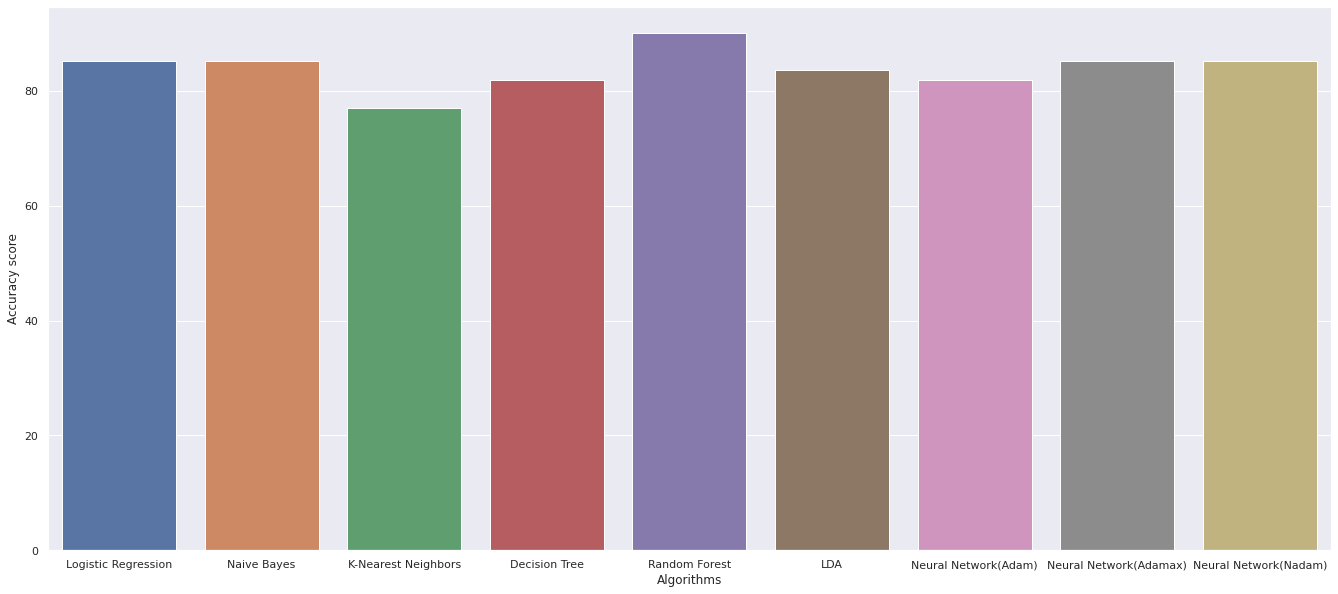

In [ ]:
#Plot of Accuracy Score for different models
sns.set(rc={'figure.figsize':(23,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(Y_test,Y_pred_lr)
cm_nb = confusion_matrix(Y_test,Y_pred_nb)
cm_knn = confusion_matrix(Y_test,Y_pred_knn)
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
cm_lda = confusion_matrix(Y_test,Y_pred_lda)
cm_nn_o1 = confusion_matrix(Y_test,Y_pred_nn_o1)
cm_nn_o2 = confusion_matrix(Y_test,Y_pred_nn_o2)
cm_nn_o3 = confusion_matrix(Y_test,Y_pred_nn_o3)

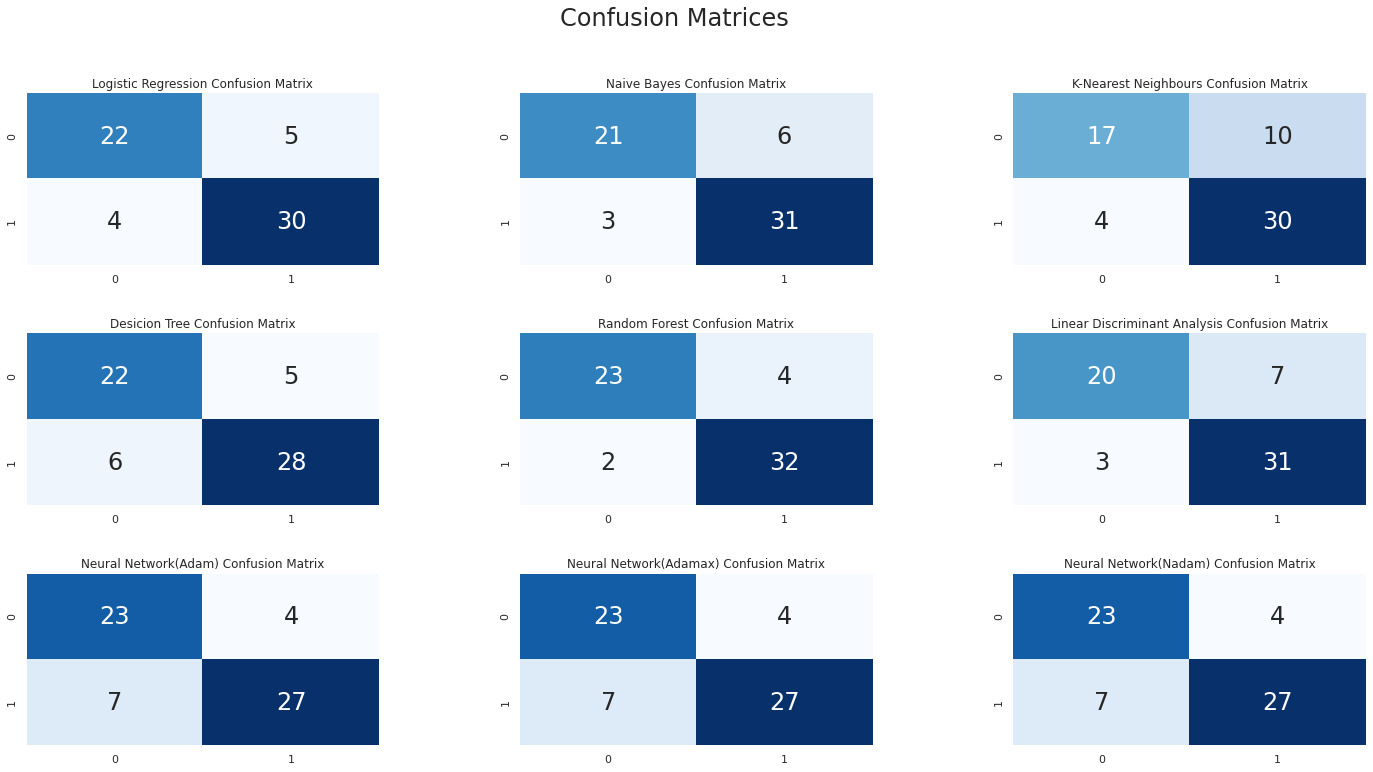

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("K-Nearest Neighbours Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Desicion Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Linear Discriminant Analysis Confusion Matrix")
sns.heatmap(cm_lda,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Neural Network(Adam) Confusion Matrix")
sns.heatmap(cm_nn_o1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Neural Network(Adamax) Confusion Matrix")
sns.heatmap(cm_nn_o1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,9)
plt.title("Neural Network(Nadam) Confusion Matrix")
sns.heatmap(cm_nn_o1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()


In [ ]:
#save the model using pickle

In [ ]:
# import libraries 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier     #import RandomForestClassifier

In [ ]:
#Heart Disease UCI dataset
data=pd.read_csv('/content/heart.csv')

In [ ]:
#Split data into train and test dataset
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
#Train the model
rf = RandomForestClassifier(random_state=323)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=323,
                       verbose=0, warm_start=False)

In [ ]:
# Import pickle Package
import pickle

In [ ]:
# Save the Modle to file in the current working directory
HeartPrediction = "Pickle_RF_Model.pkl"  

with open(HeartPrediction, 'wb') as file:  
    pickle.dump(rf, file)

In [ ]:
# Load the Model back from file
with open(HeartPrediction, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=323,
                       verbose=0, warm_start=False)

In [ ]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_RF_Model.score(X_test, Y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_RF_Model.predict(X_test)  
Ypredict

Test score: 90.16 %


array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])